In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#%cd /content/drive/MyDrive/Colab/diffusion/generative-inverse-heat-dissipation
%cd /content/drive/MyDrive/diffusion/generative-inverse-heat-dissipation

/content/drive/.shortcut-targets-by-id/10DJu4TqH_H_4VmdC2S9-vHrJHIb6GZaj/diffusion/generative-inverse-heat-dissipation


In [ ]:
#!pip install mpi4py

In [ ]:
# from mpi4py import MPI
# shard=MPI.COMM_WORLD.Get_rank(),
# num_shards=MPI.COMM_WORLD.Get_size(),
# print('shard',shard)  #(0,)
# print('num_shards',num_shards) #(1,)

In [ ]:
#!pip install -r requirements.txt

In [3]:
!pip install blobfile -q
!pip install ml_collections -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# Sampling from model trained with cifar10

In [ ]:
# sampling from model trained with cifar10
# bluring method : fftblur
!python sampling_from_train.py --config configs/cifar10/default_cifar10_configs.py --workdir ./runs/cifar/fftblur  --blur_type fftblur

In [ ]:
# sampling from model trained with cifar10
# bluring method : dctblur
!python sampling_from_train.py --config configs/cifar10/default_cifar10_configs.py --workdir ./runs/cifar/dctblur --blur_type dctblur

In [ ]:
# sampling from model trained with cifar10
# bluring method : fftblur_scale
!python sampling_from_train.py --config configs/cifar10/default_cifar10_configs.py --workdir ./runs/cifar/fftblur_scale  --blur_type fftblur

In [4]:
# sampling from model trained with cifar10
# bluring method : fftblur_scale800
!python sampling_from_train.py --config configs/cifar10/default_cifar10_configs.py --workdir ./runs/cifar/fftblur_scale800  --blur_type fftblur

2024-04-16 04:46:05.136361: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 04:46:05.136421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 04:46:05.137861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 04:46:06.272541: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
initial_step: 24001
Files already downloaded and verified
Files already downloaded and verified
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total.

# Sampling from model trained with mnist

In [ ]:
# sampling from model trained with mnist
# bluring method : dctblur
!python sampling_from_train.py --config configs/mnist/default_mnist_configs.py --workdir ./runs/mnist/dctblur --blur_type dctblur

In [ ]:
# sampling from model trained with mnist
# bluring method : dctblur
!python sampling_from_train.py --config configs/mnist/default_mnist_configs.py --workdir ./runs/mnist/fftblur --blur_type fftblur

# Official sampling from github code

In [ ]:
# sampling from model trained with cifar10
# bluring method : dctblur
!python sample.py --config configs/cifar10/default_cifar10_configs.py --workdir ./runs/cifar/dctblur --blur_type dctblur  --checkpoint 0 --batch_size=200

In [ ]:
# sampling from model trained with cifar10
# bluring method : fftblur
!python sample.py --config configs/cifar10/default_cifar10_configs.py --workdir ./runs/cifar/fftblur --blur_type fftblur  --checkpoint 0 --batch_size=32


In [ ]:
# sampling from model trained with mnist
# bluring method : fftblur
!python sample.py --config configs/mnist/default_mnist_configs.py --workdir runs/mnist/fftblur --blur_type fftblur  --checkpoint 0 --batch_size=32

In [ ]:
# sampling from model trained with mnist
# bluring method : dctblur
!python sample.py --config configs/mnist/default_mnist_configs.py --workdir runs/mnist/dctblur --blur_type dctblur   --checkpoint 0 --batch_size=32

# Merge np files to npz

In [6]:
import os
import torch
import numpy as np
import torchvision
from torchvision.utils import make_grid

In [7]:
# ./runs/cifar/dctblur/batch samples/final1.np
#..
# ./runs/cifar/dctblur/batch samples/final99.np

# ./runs/cifar/fftblur/batch samples/final0.np
#..
# ./runs/cifar/fftblur/batch samples/final99.np

#samples_dir = './runs/cifar/dctblur/batch samples'  # 99
#samples_dir = './runs/cifar/fftblur/batch samples'  # 100
#samples_dir = './runs/cifar/fftblur_scale/batch samples'  # 100
samples_dir = './runs/cifar/fftblur_scale800/batch samples'  # 100


files = os.listdir(samples_dir)
npfiles = [file for file in files if file.endswith('.np')]
print(len(npfiles))

100


In [8]:
def show_torchbatch_imgs(imgs,nrow=4):
    img_grid = make_grid(imgs,nrow=nrow,padding=2)
    img_tmp = torchvision.transforms.ToPILImage()(img_grid)
    display(img_tmp) # img_tmp.show()
    #fig=plt.figure()
    #fig.set_size_inches(1,8)
    #plt.imshow(img_grid.permute(1,2,0))
    #plt.axis('off')
    #plt.show()
    return

In [9]:
def show_numpybatch_imgs(imgs,nrow=4):
    img_grid = make_grid(torch.tensor(imgs).permute(0,3,1,2),nrow=nrow,padding=2)
    img_tmp = torchvision.transforms.ToPILImage()(img_grid)
    display(img_tmp) # img_tmp.show()
    #fig=plt.figure()
    #fig.set_size_inches(1,8)
    #plt.imshow(img_grid.permute(1,2,0))
    #plt.axis('off')
    #plt.show()
    return

In [ ]:
def min_max_norm_torchimage(x:torch.tensor):
    """
    Returns the min-max normalization per image in the
    batch instead of over the entire batch of images.
    """
    b = x.shape[0]
    x_min = x.view(b, -1).min(dim=1).values[:, None, None, None]
    x_max = x.view(b, -1).max(dim=1).values[:, None, None, None]
    return (x - x_min) / (x_max - x_min)

In [11]:
def min_max_norm_numpyimage(x:np.ndarray):
    """
    Returns the min-max normalization per image in the
    batch instead of over the entire batch of images.
    """
    b = x.shape[0]
    x_min = x.reshape(b, -1).min(axis=1)[:, None, None, None]
    x_max = x.reshape(b, -1).max(axis=1)[:, None, None, None]
    return (x - x_min) / (x_max - x_min)

In [12]:
dataset_split_len = 12000
npz_name = 'fftblur_scale800'
npdata_list = []
for file in npfiles:
    npfile = os.path.join(samples_dir,file)
    x = np.load(npfile)
    x = x.transpose(0,2,3,1)
    x = min_max_norm_numpyimage(x)
    x = (x * 255).clip(0,255).astype(np.uint8)
    npdata_list.append(x)
imgs=np.concatenate(npdata_list,axis=0)
print('count batch =',len(npdata_list))
print('img_batch.shape=',imgs.shape)
ref_path=f'./ref_batch/cifar_{npz_name}_sampling_{dataset_split_len}.npz' #
np.savez(ref_path,imgs[:dataset_split_len])
print('imgs saved in ',ref_path)

count batch = 100
img_batch.shape= (12800, 32, 32, 3)
imgs saved in  ./ref_batch/cifar_fftblur_scale800_sampling_12000.npz


In [13]:
ref_path = './ref_batch/cifar_fftblur_scale800_sampling_12000.npz'
arr=np.load(ref_path)
arr.files

['arr_0']

In [14]:
arr['arr_0'].shape

(12000, 32, 32, 3)

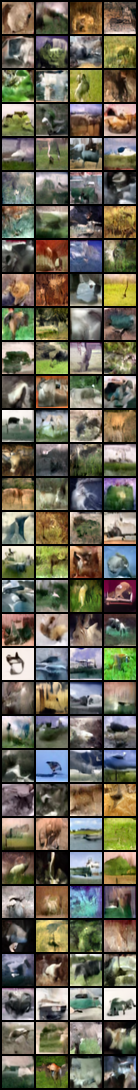

In [15]:
show_numpybatch_imgs(npdata_list[0])